In [1]:
%matplotlib inline
from __future__ import division, print_function

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from folder_manipulations import mkdir_p
import gc_colors
import pandas as pd
import glob
import re
import os 
import TBFunctions as TB
import danplotlib as dpl
import numpy as np
import scipy.stats as stats
import root_pandas as rp
from Clusteralgorithm import cluster_algorithm
from Clustering import cluster_algo_settings
import seaborn.apionly as sns
from itertools import izip

plt.style.use("presentation")
gc_colors.update_colorcycle()

# Clusteralgorithm settings

In [2]:
cluster_algo_settings

{'Big': {'continue_th': 1, 'min_size': 2, 'seed_th': 2, 'single_ch_th': 3},
 'Default': {'min_size': 2, 'seed_th': 2, 'single_ch_th': 3},
 'No_requirements': {'min_size': 0, 'seed_th': 2, 'single_ch_th': 0},
 'Seed_1': {'min_size': 0, 'seed_th': 1, 'single_ch_th': 0}}

# List all available PACIFIC files

In [3]:
Files_PACIFIC = TB.Files_DF("/auto/data/berninghoff/tb2017_1_Output/Preselection/*/wClusters/*.h5")
Files_PACIFIC.iloc[:,:0:-1]

Filename_short  Position  ThSetting  IntSetting  \
0   2.0GeV_setting4.2_000mm_1_noComment.h5         0          2           4   
1   2.0GeV_setting4.1_000mm_1_noComment.h5         0          1           4   
2   6.0GeV_setting4.2_000mm_1_noComment.h5         0          2           4   
3   5.0GeV_setting4.2_000mm_1_noComment.h5         0          2           4   
4   3.0GeV_setting4.2_000mm_1_noComment.h5         0          2           4   
5   4.0GeV_setting4.2_000mm_1_noComment.h5         0          2           4   
6   1.0GeV_setting4.2_000mm_1_noComment.h5         0          2           4   
7   2.0GeV_setting4.3_000mm_1_noComment.h5         0          3           4   
8   2.0GeV_setting4.2_000mm_1_noComment.h5         0          2           4   
9   2.0GeV_setting4.1_000mm_1_noComment.h5         0          1           4   
10  6.0GeV_setting4.2_000mm_1_noComment.h5         0          2           4   
11  5.0GeV_setting4.2_000mm_1_noComment.h5         0          2           4   
12  3.0GeV_setting4.2_000mm_1_noComment.h5         0          2           4   
13  4.0GeV_setting4.2_000mm_1_noComment.h5         0          2           4   
14  1.0GeV_setting4.2_000mm_1_noComment.h5         0          2           4   
15  2.0GeV_setting4.3_000mm_1_noComment.h5         0          3           4   

    Beamenergy  Layer  
0            2      0  
1            2      0  
2            6      0  
3            5      0  
4            3      0  
5            4      0  
6            1      0  
7            2      0  
8            2      1  
9            2      1  
10           6      1  
11           5      1  
12           3      1  
13           4      1  
14           1      1  
15           2      1

# List all available SPIROC files

In [5]:
Files_SPIROC = TB.SPIROC_Files_DF("/auto/data/berninghoff/tb2017_1_Output/SPIROC/Preselection/*/wClusters/*.h5")
Files_SPIROC.iloc[:,:0:-1]

Filename_short  ThSetting  Beamenergy  Layer
0  tb2017_1_spiroc_3GeV_ThS3.h5          3           3      0
1  tb2017_1_spiroc_3GeV_ThS1.h5          1           3      0
2  tb2017_1_spiroc_3GeV_ThS2.h5          2           3      0
3  tb2017_1_spiroc_3GeV_ThS3.h5          3           3      1
4  tb2017_1_spiroc_3GeV_ThS2.h5          2           3      1
5  tb2017_1_spiroc_3GeV_ThS1.h5          1           3      1

# Select files for later reading

In [6]:
Files_PACIFIC_sel = Files_PACIFIC.query("Beamenergy == 2 and Position == 0 and IntSetting == 4")
Files_SPIROC_sel =  Files_SPIROC

print("PACIFIC\n", "\n".join(Files_PACIFIC_sel["Filename"]))
print("\nSPIROC\n", "\n".join(Files_SPIROC_sel["Filename"]))

PACIFIC
 /auto/data/berninghoff/tb2017_1_Output/Preselection/Layer_0/wClusters/tb2017_1_pacific_2.0GeV_setting4.2_000mm_1_noComment.h5
/auto/data/berninghoff/tb2017_1_Output/Preselection/Layer_0/wClusters/tb2017_1_pacific_2.0GeV_setting4.1_000mm_1_noComment.h5
/auto/data/berninghoff/tb2017_1_Output/Preselection/Layer_0/wClusters/tb2017_1_pacific_2.0GeV_setting4.3_000mm_1_noComment.h5
/auto/data/berninghoff/tb2017_1_Output/Preselection/Layer_1/wClusters/tb2017_1_pacific_2.0GeV_setting4.2_000mm_1_noComment.h5
/auto/data/berninghoff/tb2017_1_Output/Preselection/Layer_1/wClusters/tb2017_1_pacific_2.0GeV_setting4.1_000mm_1_noComment.h5
/auto/data/berninghoff/tb2017_1_Output/Preselection/Layer_1/wClusters/tb2017_1_pacific_2.0GeV_setting4.3_000mm_1_noComment.h5

SPIROC
 /auto/data/berninghoff/tb2017_1_Output/SPIROC/Preselection/Layer_0/wClusters/tb2017_1_spiroc_3GeV_ThS3.h5
/auto/data/berninghoff/tb2017_1_Output/SPIROC/Preselection/Layer_0/wClusters/tb2017_1_spiroc_3GeV_ThS1.h5
/auto/data/ber

# Read in data with selection

In [7]:
algos = [ "Big", "Seed_1", "No_requirements" ]

PACIFIC_selection = "Finetiming >= 12 and Finetiming <= 24 and BXing == 1 and Integrator == 0"
SPIROC_selection = None

Files_PACIFIC_data = TB.read_HDFs(Files_PACIFIC_sel, selection=PACIFIC_selection, clusteralgos=algos)
Files_SPIROC_data = TB.read_HDFs(Files_SPIROC_sel, selection=SPIROC_selection, clusteralgos=algos)

Reading in data from /auto/data/berninghoff/tb2017_1_Output/Preselection/Layer_0/wClusters/tb2017_1_pacific_2.0GeV_setting4.2_000mm_1_noComment.h5
Cluster algorithms ['Big', 'Seed_1', 'No_requirements']
Reading in data from /auto/data/berninghoff/tb2017_1_Output/Preselection/Layer_0/wClusters/tb2017_1_pacific_2.0GeV_setting4.1_000mm_1_noComment.h5
Cluster algorithms ['Big', 'Seed_1', 'No_requirements']
Reading in data from /auto/data/berninghoff/tb2017_1_Output/Preselection/Layer_0/wClusters/tb2017_1_pacific_2.0GeV_setting4.3_000mm_1_noComment.h5
Cluster algorithms ['Big', 'Seed_1', 'No_requirements']
Reading in data from /auto/data/berninghoff/tb2017_1_Output/Preselection/Layer_1/wClusters/tb2017_1_pacific_2.0GeV_setting4.2_000mm_1_noComment.h5
Cluster algorithms ['Big', 'Seed_1', 'No_requirements']
Reading in data from /auto/data/berninghoff/tb2017_1_Output/Preselection/Layer_1/wClusters/tb2017_1_pacific_2.0GeV_setting4.1_000mm_1_noComment.h5
Cluster algorithms ['Big', 'Seed_1', 'No_

# Plot cluster size distribution

In [81]:
filename = "Plots/PACIFIC_vs_SPIROC/Cluster_sizes.pdf"
mkdir_p(os.path.dirname(filename))
pp = PdfPages(filename)

#Algorithms to compare
cluster_algorithms = algos

#Plotting settings
binning = np.arange(-0.5, 25.5, 1)
logy = True

for idx, P_row in Files_PACIFIC_data.sort_values(["Layer", "ThSetting"]).iterrows():
    print("PACIFIC:", P_row["Filename_short"])
    corr_SPIROC = Files_SPIROC_data.query("Layer == {} and ThSetting == {}".format(P_row["Layer"], P_row["ThSetting"]))
    if len(corr_SPIROC) > 1:
        raise ValueError("More than one SPIROC file found")
    else:
        corr_SPIROC = corr_SPIROC.iloc[0]
    print("SPIROC:", corr_SPIROC["Filename_short"])
    
    DF_P = P_row["Dataframe"]
    DF_S = corr_SPIROC["Dataframe"]
    
    for algo in cluster_algorithms:
        cluster_sizes_P = [ cluster.Size() for evt_clusters in DF_P["Clusters_{}".format(algo)] for cluster in evt_clusters ]
        cluster_sizes_S = [ cluster.Size() for evt_clusters in DF_S["Clusters_{}".format(algo)] for cluster in evt_clusters ]

        dpl.hist(cluster_sizes_P, bins=binning, weights=len(cluster_sizes_P)*[1./len(DF_P)], log=logy, 
                 histtype="step", label="PACIFIC")
        dpl.hist(cluster_sizes_S, bins=binning, weights=len(cluster_sizes_S)*[1./len(DF_S)], log=logy, 
                 histtype="step", label="SPIROC")

        plt.legend()
        plt.title("{}\nLayer {}, Algorithm {}".format(P_row["Filename_short"], P_row["Layer"], algo ))
        dpl.xlabel("Cluster size [ Channels ]")
        dpl.ylabel("Normalised entries")
        plt.xlim(binning[0], binning[-1])
        pp.savefig()
        plt.close()
        
pp.close()
print("DONE")

PACIFIC: 2.0GeV_setting4.1_000mm_1_noComment.h5
SPIROC: tb2017_1_spiroc_3GeV_ThS1.h5
PACIFIC: 2.0GeV_setting4.2_000mm_1_noComment.h5
SPIROC: tb2017_1_spiroc_3GeV_ThS2.h5
PACIFIC: 2.0GeV_setting4.3_000mm_1_noComment.h5
SPIROC: tb2017_1_spiroc_3GeV_ThS3.h5
PACIFIC: 2.0GeV_setting4.1_000mm_1_noComment.h5
SPIROC: tb2017_1_spiroc_3GeV_ThS1.h5
PACIFIC: 2.0GeV_setting4.2_000mm_1_noComment.h5
SPIROC: tb2017_1_spiroc_3GeV_ThS2.h5
PACIFIC: 2.0GeV_setting4.3_000mm_1_noComment.h5
SPIROC: tb2017_1_spiroc_3GeV_ThS3.h5
DONE


# Plot efficiency 

In [9]:
filename = "Plots/PACIFIC_vs_SPIROC/Efficiency.pdf"
mkdir_p(os.path.dirname(filename))
pp = PdfPages(filename)

#Algorithms to compare
cluster_algorithms = algos
res = 8

#channels_PACIFIC = range(0, 49, 1)
channels_PACIFIC = range(2, 47, 1)   #Avoid randeffekte
#channels_SPIROC = range(192, 241, 1)
channels_SPIROC = range(194, 239, 1)  #Avoid randeffekte

for idx, P_row in Files_PACIFIC_data.sort_values(["Layer", "ThSetting"]).iterrows():
    print("PACIFIC:", P_row["Filename"])
    corr_SPIROC = Files_SPIROC_data.query("Layer == {} and ThSetting == {}".format(P_row["Layer"], P_row["ThSetting"]))
    if len(corr_SPIROC) > 1:
        raise ValueError("More than one SPIROC file found")
    else:
        corr_SPIROC = corr_SPIROC.iloc[0]
    print("SPIROC:", corr_SPIROC["Filename"])
    
    DF_P = P_row["Dataframe"]
    DF_S = corr_SPIROC["Dataframe"]
    
    for algo in cluster_algorithms:
        total_eff_P, channel_eff_P, _, _, channels_P = TB.cluster_efficiencies(DF_P["TrackHit_Ch"],
            DF_P["Clusters_"+algo], resolution=res, channel_range=channels_PACIFIC)
        total_eff_S, channel_eff_S, _, _, channels_S = TB.cluster_efficiencies(DF_S["TrackHit_Ch"],
            DF_S["Clusters_"+algo], resolution=res, channel_range=channels_SPIROC) 
        
        dpl.errorbar(channels_P, channel_eff_P[0], xerr=0.5, yerr=channel_eff_P[1:], fmt=".", ms=0,
                    label="PACIFIC, $\epsilon = ({:.2f}_{{-{:.2f}}}^{{+{:.2f}}}) \%$".format(*(np.asarray(total_eff_P)*100)))
        dpl.errorbar(channels_P, channel_eff_S[0], xerr=0.5, yerr=channel_eff_S[1:], fmt=".", ms=0,
                    label="SPIROC, $\epsilon = ({:.2f}_{{-{:.2f}}}^{{+{:.2f}}}) \%$".format(*(np.asarray(total_eff_S)*100)))   
        
        """"
        #Further selection
        total_eff_P_sel, channel_eff_P_sel, _, _, channels_P_sel = TB.cluster_efficiencies(DF_P_sel["TrackHit_Ch"],
            DF_P_sel["Clusters_"+algo], resolution=res, channel_range=channels_PACIFIC)
        total_eff_S_sel, channel_eff_S_sel, _, _, channels_S_sel = TB.cluster_efficiencies(DF_S_sel["TrackHit_Ch"],
            DF_S_sel["Clusters_"+algo], resolution=res, channel_range=channels_SPIROC) 
      
        dpl.errorbar(channels_P_sel, channel_eff_P_sel[0], xerr=0.5, yerr=channel_eff_P_sel[1:], fmt=".", ms=0,
                    label="PACIFIC (Sel), $\epsilon = ({:.2f}_{{-{:.2f}}}^{{+{:.2f}}}) \%$"
                    "".format(*(np.asarray(total_eff_P_sel)*100)))
        dpl.errorbar(channels_P_sel, channel_eff_S_sel[0], xerr=0.5, yerr=channel_eff_S_sel[1:], fmt=".", ms=0,
                    label="SPIROC (Sel), $\epsilon = ({:.2f}_{{-{:.2f}}}^{{+{:.2f}}}) \%$"
                    "".format(*(np.asarray(total_eff_S_sel)*100)))
                    
        """
    
        plt.legend(fontsize=18)
        plt.title("{}\nLayer {}, Algorithm {}".format(P_row["Filename_short"], P_row["Layer"], algo) )
        dpl.xlabel("Channel")
        dpl.ylabel("Efficiency")
        if P_row["ThSetting"] == 1:
            plt.ylim(0.91, 1.005)
        elif P_row["ThSetting"] == 3:
            plt.ylim(0.7, 1.01)
        elif P_row["ThSetting"] == 2:
            plt.ylim(0.8, 1.01)
        pp.savefig()
        plt.close()
        
pp.close()
print("DONE")

PACIFIC: /auto/data/berninghoff/tb2017_1_Output/Preselection/Layer_0/wClusters/tb2017_1_pacific_2.0GeV_setting4.1_000mm_1_noComment.h5
SPIROC: /auto/data/berninghoff/tb2017_1_Output/SPIROC/Preselection/Layer_0/wClusters/tb2017_1_spiroc_3GeV_ThS1.h5
PACIFIC: /auto/data/berninghoff/tb2017_1_Output/Preselection/Layer_0/wClusters/tb2017_1_pacific_2.0GeV_setting4.2_000mm_1_noComment.h5
SPIROC: /auto/data/berninghoff/tb2017_1_Output/SPIROC/Preselection/Layer_0/wClusters/tb2017_1_spiroc_3GeV_ThS2.h5
PACIFIC: /auto/data/berninghoff/tb2017_1_Output/Preselection/Layer_0/wClusters/tb2017_1_pacific_2.0GeV_setting4.3_000mm_1_noComment.h5
SPIROC: /auto/data/berninghoff/tb2017_1_Output/SPIROC/Preselection/Layer_0/wClusters/tb2017_1_spiroc_3GeV_ThS3.h5
PACIFIC: /auto/data/berninghoff/tb2017_1_Output/Preselection/Layer_1/wClusters/tb2017_1_pacific_2.0GeV_setting4.1_000mm_1_noComment.h5
SPIROC: /auto/data/berninghoff/tb2017_1_Output/SPIROC/Preselection/Layer_1/wClusters/tb2017_1_spiroc_3GeV_ThS1.h5
PACI

# Plot efficiency for different SPIROC runs

In [8]:
filename = "Plots/PACIFIC_vs_SPIROC/Efficiency_SPIROC_Runs.pdf"
mkdir_p(os.path.dirname(filename))
pp = PdfPages(filename)

#Algorithms to compare
cluster_algorithms = algos
res = 4

channels_PACIFIC = range(0, 49, 1)
channels_SPIROC = range(192, 241, 1)

for idx, P_row in Files_PACIFIC_data.iterrows():
    print("PACIFIC:", P_row["Filename"])
    corr_SPIROC = Files_SPIROC_data.query("Layer == {} and ThSetting == {}".format(P_row["Layer"], P_row["ThSetting"]))
    if len(corr_SPIROC) > 1:
        raise ValueError("More than one SPIROC file found")
    else:
        corr_SPIROC = corr_SPIROC.iloc[0]
    print("SPIROC:", corr_SPIROC["Filename"])
    
    DF_P = P_row["Dataframe"]
    DF_S = corr_SPIROC["Dataframe"]
    
    SPIROC_runs = np.unique(DF_S["Run_num"])
    
    for SPIROC_run in SPIROC_runs:
        print(SPIROC_run)
        DF_S_run = DF_S[ DF_S["Run_num"] == SPIROC_run ]
        print(len(DF_S_run))
        for algo in cluster_algorithms:
            total_eff_P, channel_eff_P, _, _, channels_P = TB.cluster_efficiencies(DF_P["TrackHit_Ch"],
                DF_P["Clusters_"+algo], resolution=res, channel_range=channels_PACIFIC)
            total_eff_S, channel_eff_S, _, _, channels_S = TB.cluster_efficiencies(DF_S_run["TrackHit_Ch"],
                DF_S_run["Clusters_"+algo], resolution=res, channel_range=channels_SPIROC) 

            dpl.errorbar(channels_P, channel_eff_P[0], xerr=0.5, yerr=channel_eff_P[1:], fmt=".", ms=0,
                        label="PACIFIC")
            dpl.errorbar(channels_P, channel_eff_S[0], xerr=0.5, yerr=channel_eff_S[1:], fmt=".", ms=0,
                        label="SPIROC")     

            plt.legend()
            plt.title("{}\nLayer {}, Algorithm {}\nSPIROC Run {}".format(P_row["Filename_short"], 
                                                                         P_row["Layer"], algo, 
                                                                         SPIROC_run).replace("_", "\_") )
            dpl.xlabel("PACIFIC Channel")
            dpl.ylabel("Efficiency")
            pp.savefig()
            plt.close()

pp.close()
print("DONE")

PACIFIC: /auto/data/berninghoff/tb2017_1_Output/Preselection/Layer_0/wClusters/tb2017_1_pacific_2.0GeV_setting4.2_000mm_1_noComment.h5
SPIROC: /auto/data/berninghoff/tb2017_1_Output/SPIROC/Preselection/Layer_0/wClusters/tb2017_1_spiroc_3GeV_ThS2.h5
1487116222
93371
1487119226
92130
1487123430
92099
1487124031
92304
1487126433
92648
1487127034
37448
PACIFIC: /auto/data/berninghoff/tb2017_1_Output/Preselection/Layer_0/wClusters/tb2017_1_pacific_2.0GeV_setting4.1_000mm_1_noComment.h5
SPIROC: /auto/data/berninghoff/tb2017_1_Output/SPIROC/Preselection/Layer_0/wClusters/tb2017_1_spiroc_3GeV_ThS1.h5
1487116222
93371
1487119226
92130
1487123430
92099
1487124031
92304
1487126433
92648
1487127034
37448
PACIFIC: /auto/data/berninghoff/tb2017_1_Output/Preselection/Layer_0/wClusters/tb2017_1_pacific_3.0GeV_setting4.2_000mm_1_noComment.h5
SPIROC: /auto/data/berninghoff/tb2017_1_Output/SPIROC/Preselection/Layer_0/wClusters/tb2017_1_spiroc_3GeV_ThS2.h5
1487116222
93371
1487119226
92130
1487123430
9209

# Plot cluster correlation

In [70]:
filename = "Plots/PACIFIC_vs_SPIROC/Cluster_Correlation.pdf"
mkdir_p(os.path.dirname(filename))
pp = PdfPages(filename)

#Algorithms to compare
cluster_algorithms = algos

channels_PACIFIC = range(0, 49, 1)
channels_SPIROC = range(192, 241, 1)

for idx, P_row in Files_PACIFIC_data.iterrows():
    print("PACIFIC:", P_row["Filename"])
    corr_SPIROC = Files_SPIROC_data.query("Layer == {} and ThSetting == {}".format(P_row["Layer"], P_row["ThSetting"]))
    if len(corr_SPIROC) > 1:
        raise ValueError("More than one SPIROC file found")
    else:
        corr_SPIROC = corr_SPIROC.iloc[0]
    print("SPIROC:", corr_SPIROC["Filename"])
    
    DF_P = P_row["Dataframe"]
    DF_S = corr_SPIROC["Dataframe"]
    
    for algo in cluster_algorithms:
        #PACIFIC
        trackhit_posis_P, cluster_posis_P = TB.cluster_correlation(DF_P["TrackHit_Ch"], 
                                                                   DF_P["Clusters_{}".format(algo)])
        plt.scatter(cluster_posis_P, trackhit_posis_P, s=2, rasterized=True)
        
        dpl.plot([channels_PACIFIC[0],channels_PACIFIC[-1]], [channels_PACIFIC[0],channels_PACIFIC[-1]], 
                 color="gcorange", linestyle="--", lw=2, label="y = x")

        dpl.xlabel("Cluster position [ Channel ]")
        dpl.ylabel("Track hit position [ Channel ]")
        
        plt.title("PACIFIC({})\nLayer {}, Algorithm {}".format(P_row["Filename_short"], P_row["Layer"], 
                                                               algo).replace("_", "\_") )
        pp.savefig()
        plt.close()
        
        #SPIROC
        trackhit_posis_S, cluster_posis_S = TB.cluster_correlation(DF_S["TrackHit_Ch"], 
                                                                   DF_S["Clusters_{}".format(algo)])
        plt.scatter(cluster_posis_S, trackhit_posis_S, s=2, rasterized=True)
        dpl.xlabel("Cluster position [ Channel ]")
        dpl.ylabel("Track hit position [ Channel ]")
        
        dpl.plot([channels_SPIROC[0], channels_SPIROC[-1]], [channels_SPIROC[0], channels_SPIROC[-1]], 
                 color="gcorange", linestyle="--", lw=2, label="y = x")

        plt.title("SPIROC({})\nLayer {}, Algorithm {}".format(corr_SPIROC["Filename_short"], P_row["Layer"], 
                                                               algo).replace("_", "\_") )
        pp.savefig()
        plt.close()
        
        
pp.close()
print("DONE")

PACIFIC: /auto/data/berninghoff/tb2017_1_Output/Preselection/Layer_0/wClusters/tb2017_1_pacific_2.0GeV_setting4.2_000mm_1_noComment.h5
SPIROC: /auto/data/berninghoff/tb2017_1_Output/SPIROC/Preselection/Layer_0/wClusters/tb2017_1_spiroc_3GeV_ThS2.h5
PACIFIC: /auto/data/berninghoff/tb2017_1_Output/Preselection/Layer_0/wClusters/tb2017_1_pacific_2.0GeV_setting4.1_000mm_1_noComment.h5
SPIROC: /auto/data/berninghoff/tb2017_1_Output/SPIROC/Preselection/Layer_0/wClusters/tb2017_1_spiroc_3GeV_ThS1.h5
PACIFIC: /auto/data/berninghoff/tb2017_1_Output/Preselection/Layer_0/wClusters/tb2017_1_pacific_3.0GeV_setting4.2_000mm_1_noComment.h5
SPIROC: /auto/data/berninghoff/tb2017_1_Output/SPIROC/Preselection/Layer_0/wClusters/tb2017_1_spiroc_3GeV_ThS2.h5
PACIFIC: /auto/data/berninghoff/tb2017_1_Output/Preselection/Layer_0/wClusters/tb2017_1_pacific_2.0GeV_setting4.3_000mm_1_noComment.h5
SPIROC: /auto/data/berninghoff/tb2017_1_Output/SPIROC/Preselection/Layer_0/wClusters/tb2017_1_spiroc_3GeV_ThS3.h5
PACI

# Ratio over threshold plots for the different layers (by channel)

In [16]:
filename = "Plots/PACIFIC_vs_SPIROC/Over_threshold_ratio.pdf"
mkdir_p(os.path.dirname(filename))
pp = PdfPages(filename)b

channels_PACIFIC = range(0, 49, 1)
channels_SPIROC = range(192, 241, 1)

for idx, P_row in Files_PACIFIC_data.iterrows():
    print("PACIFIC:", P_row["Filename"])
    corr_SPIROC = Files_SPIROC_data.query("Layer == {} and ThSetting == {}".format(P_row["Layer"], P_row["ThSetting"]))
    if len(corr_SPIROC) > 1:
        raise ValueError("More than one SPIROC file found")
    else:
        corr_SPIROC = corr_SPIROC.iloc[0]
    print("SPIROC:", corr_SPIROC["Filename"])
    
    DF_P = P_row["Dataframe"]
    DF_S = corr_SPIROC["Dataframe"]
        
    #PACIFC
    ch_matrix = DF_P[ ["Ch_{}".format(ch) for ch in channels_PACIFIC] ]
    for th in [1,2,3]:
        dpl.plot( channels_PACIFIC, TB.overthreshold_vs_channels(ch_matrix, th, mode="ge")[0], "x",
                 label="= Th {}/$n_{{events}}$".format(th))
        
    plt.legend(fontsize=16)
    plt.title("PACIFIC({})\nLayer {}".format(P_row["Filename_short"], P_row["Layer"]))
    pp.savefig()
    plt.close()
    
    #SPIROC
    ch_matrix = DF_S[ ["Ch_{}".format(ch) for ch in channels_SPIROC] ]
    nevents, chans, err = TB.overthreshold_vs_channels(ch_matrix, 0, return_raw=True)
    for th in [1,2,3]:
        dpl.plot( channels_SPIROC, TB.overthreshold_vs_channels(ch_matrix, th, mode="ge")[0], "x",
                 label="= Th {}/$n_{{events}}$".format(th))
        
    plt.legend(fontsize=16)
    plt.title("SPIROC({})\nLayer {}".format(corr_SPIROC["Filename_short"], corr_SPIROC["Layer"]))
    pp.savefig()
    plt.close()
    
pp.close()
print("DONE")

PACIFIC: /auto/data/berninghoff/tb2017_1_Output/Preselection/Layer_0/wClusters/tb2017_1_pacific_2.0GeV_setting4.2_000mm_1_noComment.h5
SPIROC: /auto/data/berninghoff/tb2017_1_Output/SPIROC/Preselection/Layer_0/wClusters/tb2017_1_spiroc_3GeV_ThS2.h5
PACIFIC: /auto/data/berninghoff/tb2017_1_Output/Preselection/Layer_0/wClusters/tb2017_1_pacific_2.0GeV_setting4.1_000mm_1_noComment.h5
SPIROC: /auto/data/berninghoff/tb2017_1_Output/SPIROC/Preselection/Layer_0/wClusters/tb2017_1_spiroc_3GeV_ThS1.h5
PACIFIC: /auto/data/berninghoff/tb2017_1_Output/Preselection/Layer_0/wClusters/tb2017_1_pacific_2.0GeV_setting4.3_000mm_1_noComment.h5
SPIROC: /auto/data/berninghoff/tb2017_1_Output/SPIROC/Preselection/Layer_0/wClusters/tb2017_1_spiroc_3GeV_ThS3.h5
PACIFIC: /auto/data/berninghoff/tb2017_1_Output/Preselection/Layer_1/wClusters/tb2017_1_pacific_2.0GeV_setting4.2_000mm_1_noComment.h5
SPIROC: /auto/data/berninghoff/tb2017_1_Output/SPIROC/Preselection/Layer_1/wClusters/tb2017_1_spiroc_3GeV_ThS2.h5
PACI

# Ratio over threshold plots for the different layers (overall)

In [88]:
filename = "Plots/PACIFIC_vs_SPIROC/Over_threshold_overall.pdf"
mkdir_p(os.path.dirname(filename))
pp = PdfPages(filename)
normed=False
logy=False

channels_PACIFIC = range(0, 49, 1)
channels_SPIROC = [ ch + 192 for ch in channels_PACIFIC]

for idx, P_row in Files_PACIFIC_data.sort_values(["Layer", "ThSetting"]).iterrows():
    print("PACIFIC:", P_row["Filename"])
    corr_SPIROC = Files_SPIROC_data.query("Layer == {} and ThSetting == {}".format(P_row["Layer"], P_row["ThSetting"]))
    if len(corr_SPIROC) > 1:
        raise ValueError("More than one SPIROC file found")
    else:
        corr_SPIROC = corr_SPIROC.iloc[0]
    print("SPIROC:", corr_SPIROC["Filename"])
    
    DF_P = P_row["Dataframe"]
    DF_S = corr_SPIROC["Dataframe"]
    
    #Trackhits must fall into channel region
    DF_P_sel = DF_P.query("TrackHit_Ch > {} and TrackHit_Ch < {}"
                          "".format(channels_PACIFIC[0], channels_PACIFIC[-1]))
    DF_S_sel = DF_S.query("TrackHit_Ch > {} and TrackHit_Ch < {}"
                          "".format(channels_SPIROC[0], channels_SPIROC[-1]))
    
        
    #PACIFC
    ch_matrix = DF_P_sel[ ["Ch_{}".format(ch) for ch in channels_PACIFIC] ].values
    entries = np.zeros(4)
    for th in [0, 1, 2, 3]:
        entries[th] = np.sum(ch_matrix == th)
        
    dpl.hist([0,1,2,3], weights=entries*1./len(ch_matrix), bins=np.arange(0.5, 4, 1), label="PACIFIC", normed=normed, 
             log=logy, histtype="step")
    
    #SPIROC
    ch_matrix = DF_S_sel[ ["Ch_{}".format(ch) for ch in channels_SPIROC] ].values
    entries = np.zeros(4)
    for th in [0, 1, 2, 3]:
        entries[th] = np.sum(ch_matrix == th)
        
    dpl.hist([0,1,2,3], weights=entries*1./len(ch_matrix), bins=np.arange(0.5, 4, 1), label="SPIROC", normed=normed, 
             log=logy, histtype="step")


    plt.legend(fontsize=20, loc="upper left")
    plt.xlim(0.5, 3.5)
    plt.title("Layer {}, ThSetting {}".format(P_row["Layer"], P_row["ThSetting"]))
    dpl.ylabel("Normalised entries")
    dpl.xlabel("Ths")
    pp.savefig()
    plt.close()
    
pp.close()
print("DONE")

PACIFIC: /auto/data/berninghoff/tb2017_1_Output/Preselection/Layer_0/wClusters/tb2017_1_pacific_2.0GeV_setting4.1_000mm_1_noComment.h5
SPIROC: /auto/data/berninghoff/tb2017_1_Output/SPIROC/Preselection/Layer_0/wClusters/tb2017_1_spiroc_3GeV_ThS1.h5
PACIFIC: /auto/data/berninghoff/tb2017_1_Output/Preselection/Layer_0/wClusters/tb2017_1_pacific_2.0GeV_setting4.2_000mm_1_noComment.h5
SPIROC: /auto/data/berninghoff/tb2017_1_Output/SPIROC/Preselection/Layer_0/wClusters/tb2017_1_spiroc_3GeV_ThS2.h5
PACIFIC: /auto/data/berninghoff/tb2017_1_Output/Preselection/Layer_0/wClusters/tb2017_1_pacific_2.0GeV_setting4.3_000mm_1_noComment.h5
SPIROC: /auto/data/berninghoff/tb2017_1_Output/SPIROC/Preselection/Layer_0/wClusters/tb2017_1_spiroc_3GeV_ThS3.h5
PACIFIC: /auto/data/berninghoff/tb2017_1_Output/Preselection/Layer_1/wClusters/tb2017_1_pacific_2.0GeV_setting4.1_000mm_1_noComment.h5
SPIROC: /auto/data/berninghoff/tb2017_1_Output/SPIROC/Preselection/Layer_1/wClusters/tb2017_1_spiroc_3GeV_ThS1.h5
PACI

In [61]:
clusters = [ cluster_algorithm(charr, channel_range=range(192, 241, 1)) for charr in ch_matrix]

In [62]:
tot_eff, chan_eff, _, _, chans = TB.cluster_efficiencies(DF["TrackHit_Ch"], clusters, channel_range=range(192, 241, 1))

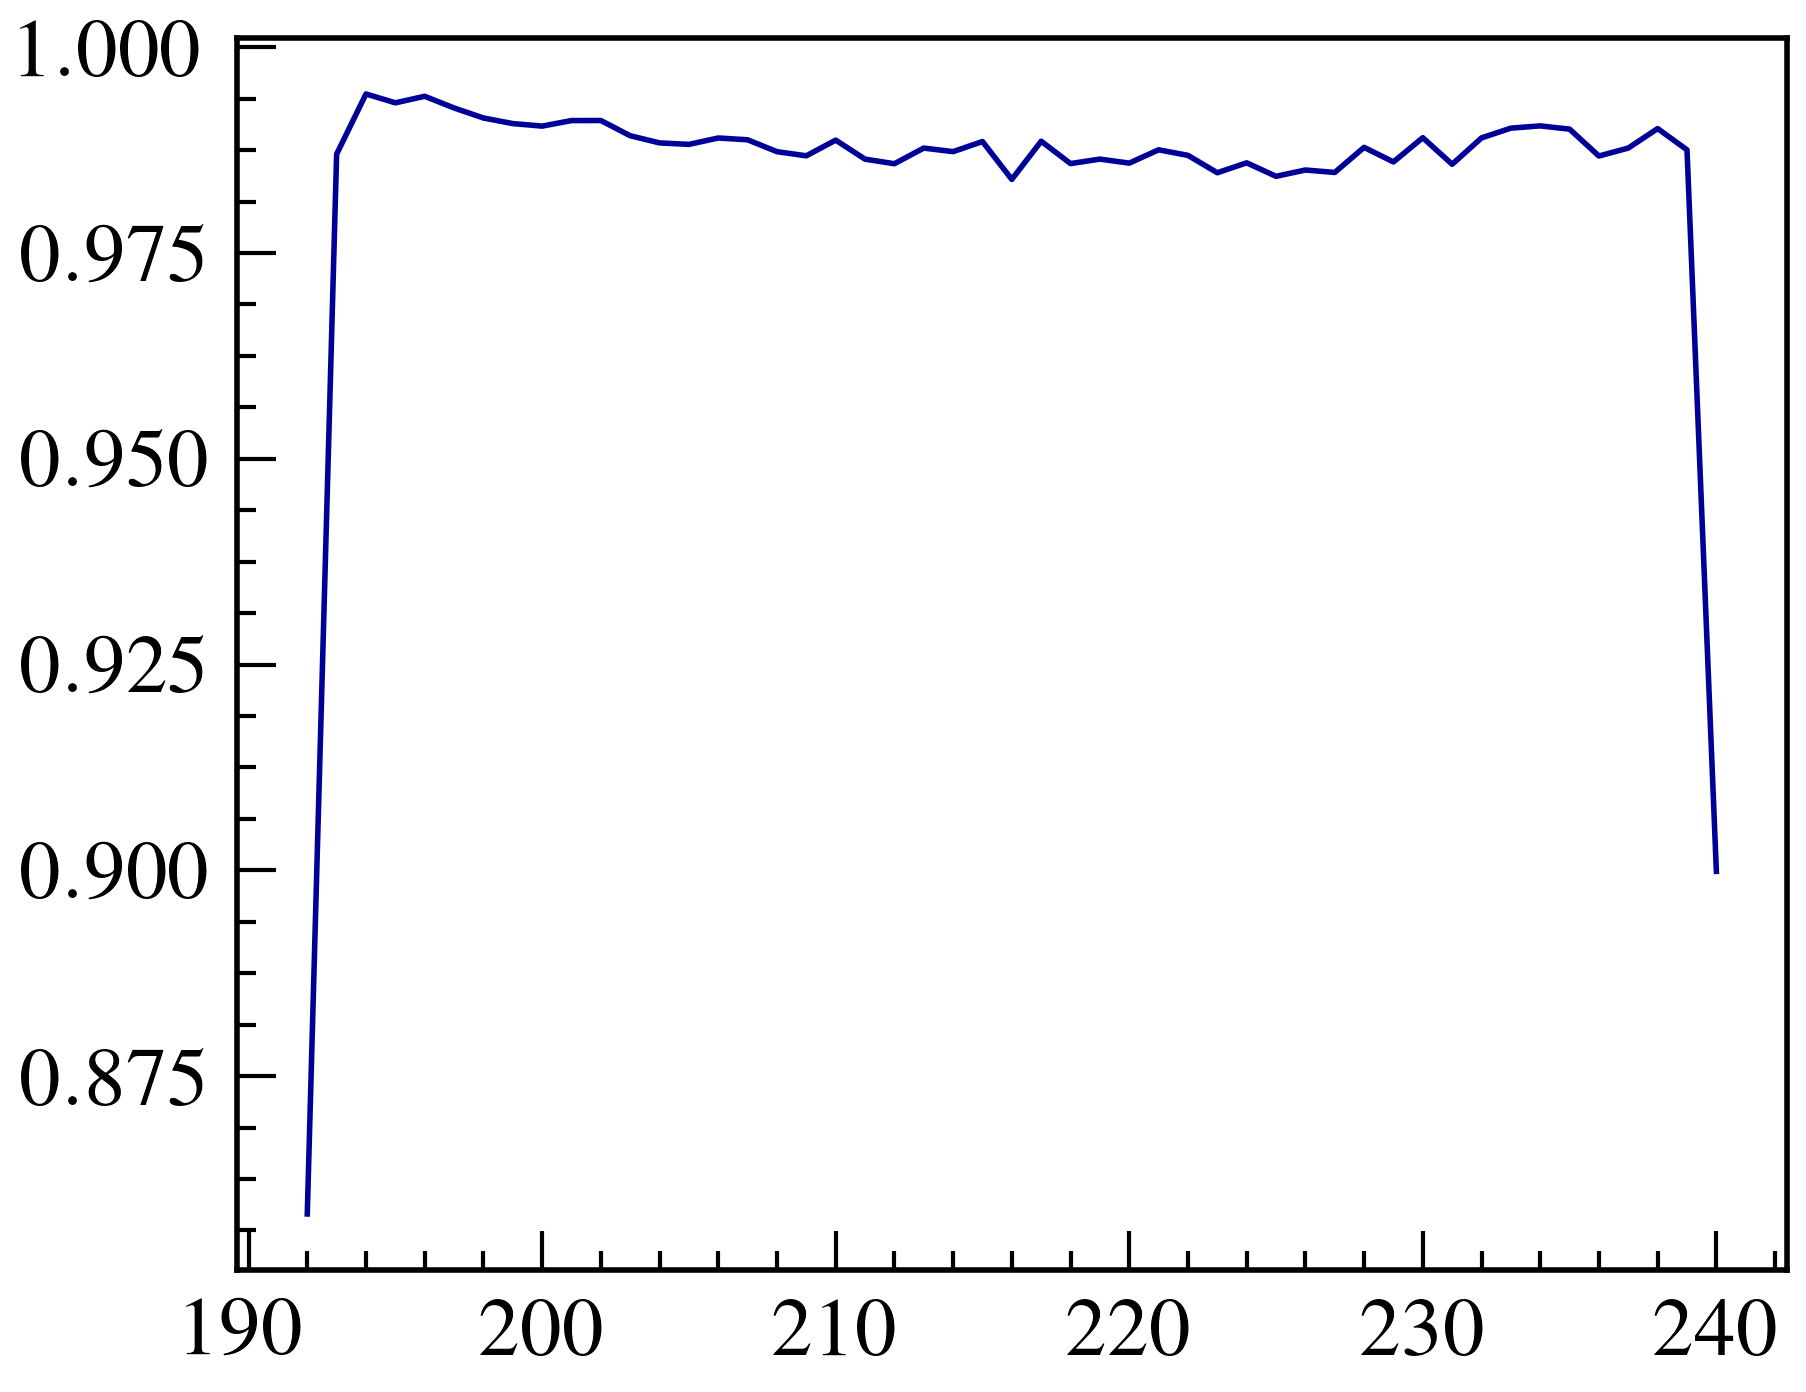

In [67]:
dpl.plot(chans, chan_eff[0])

In [69]:
Cluster_positions = []
Corr_TrackHits = []
for trackhit, evt_clusters in izip(DF["TrackHit_Ch"], clusters):
    close_cluster_posi = 180
    close_cluster_dist = -1
    for cluster in evt_clusters:
        if close_cluster_dist == -1 or abs(cluster.Position()-trackhit) < close_cluster_dist:
            close_cluster_posi = cluster.Position()
            close_cluster_dist = abs(cluster.Position() - trackhit)
    
    Cluster_positions.append(close_cluster_posi)
    Corr_TrackHits.append(trackhit)

In [70]:
print(len(Cluster_positions))
print(np.sum(np.asarray(Cluster_positions) == 180))

500000
70871


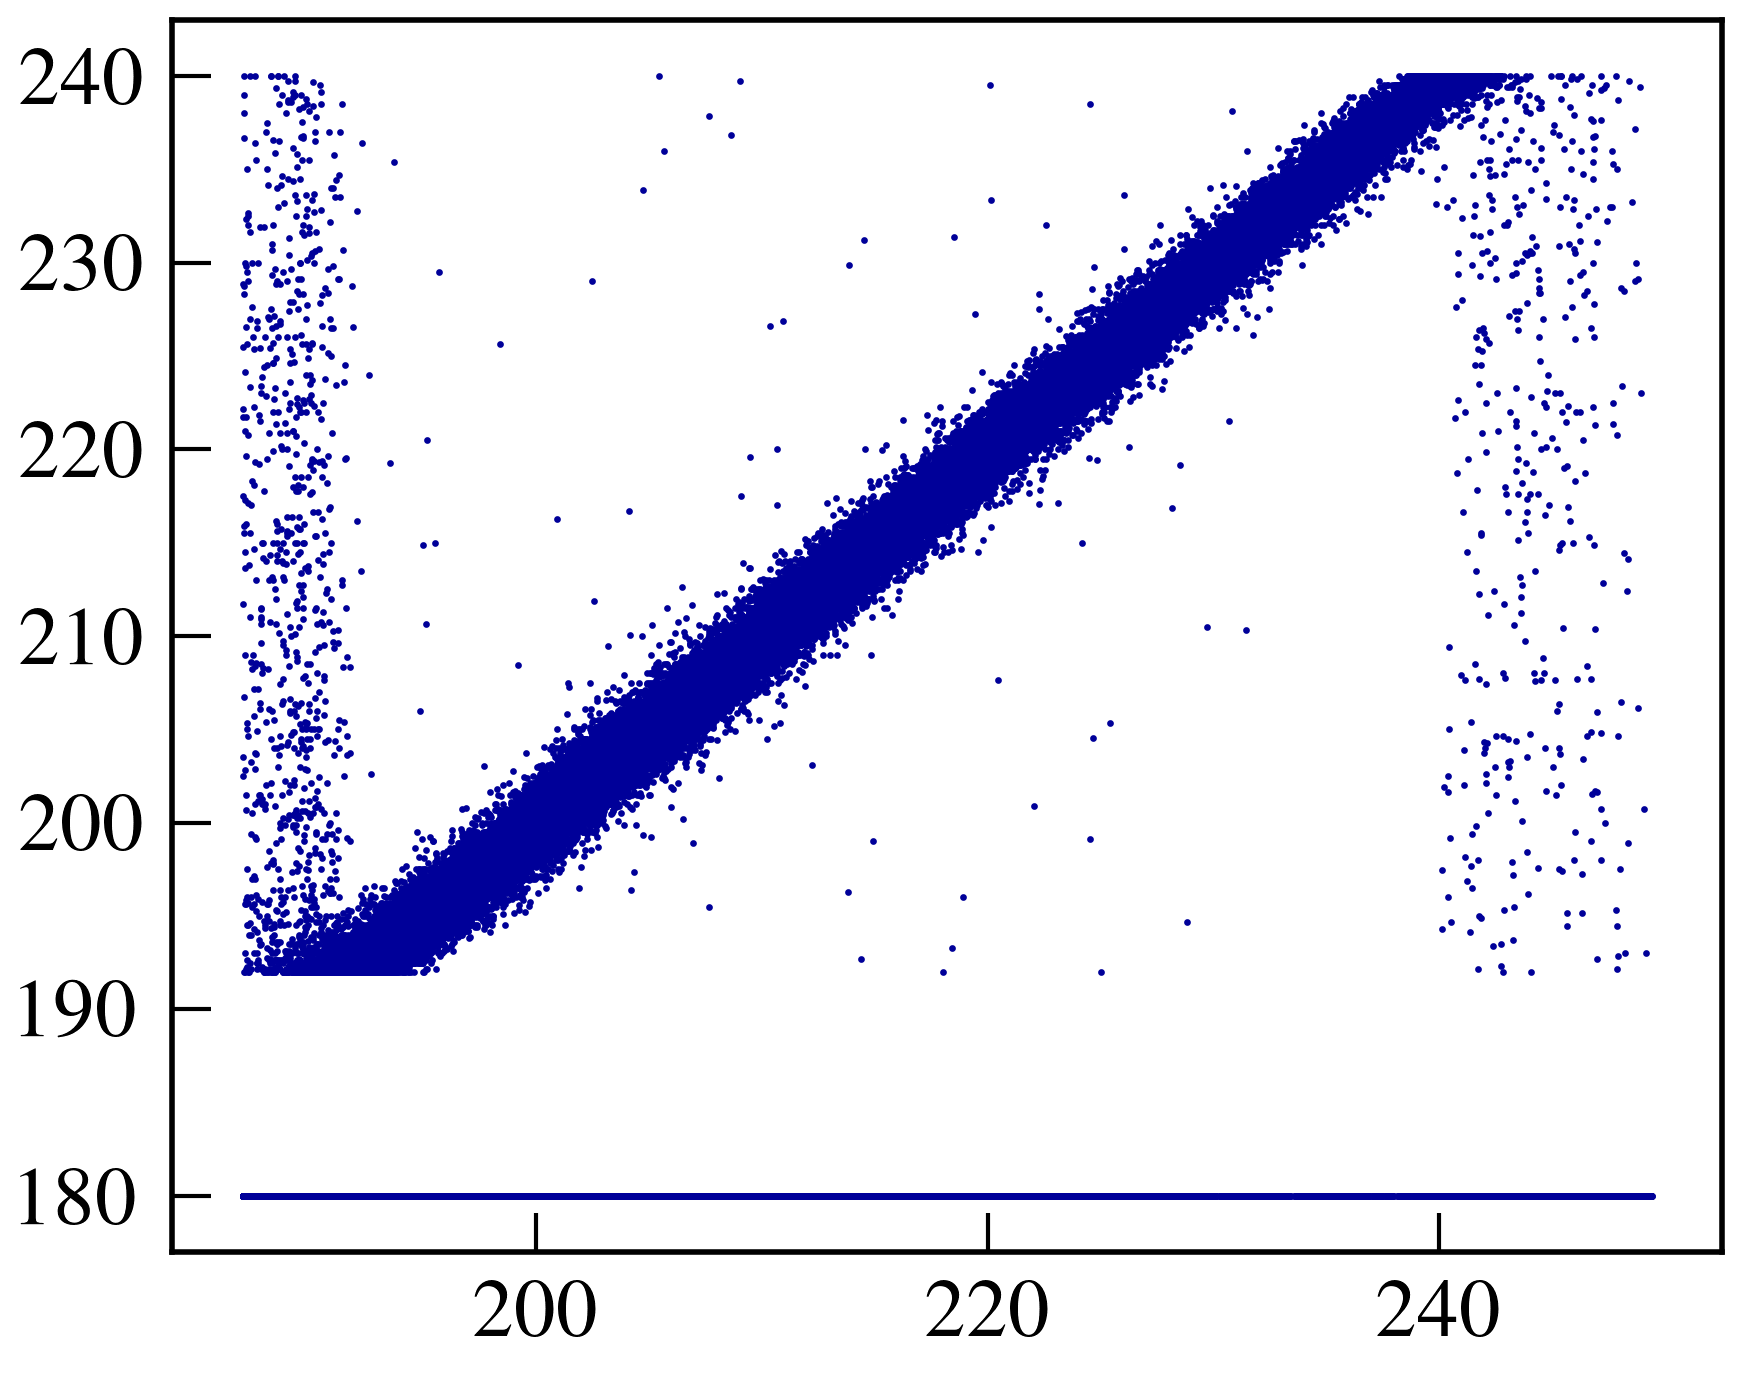

In [77]:
plt.scatter(Corr_TrackHits, Cluster_positions, s=2)

In [72]:
corr_tracks, corr_posis = TB.cluster_correlation(DF["TrackHit_Ch"], clusters)

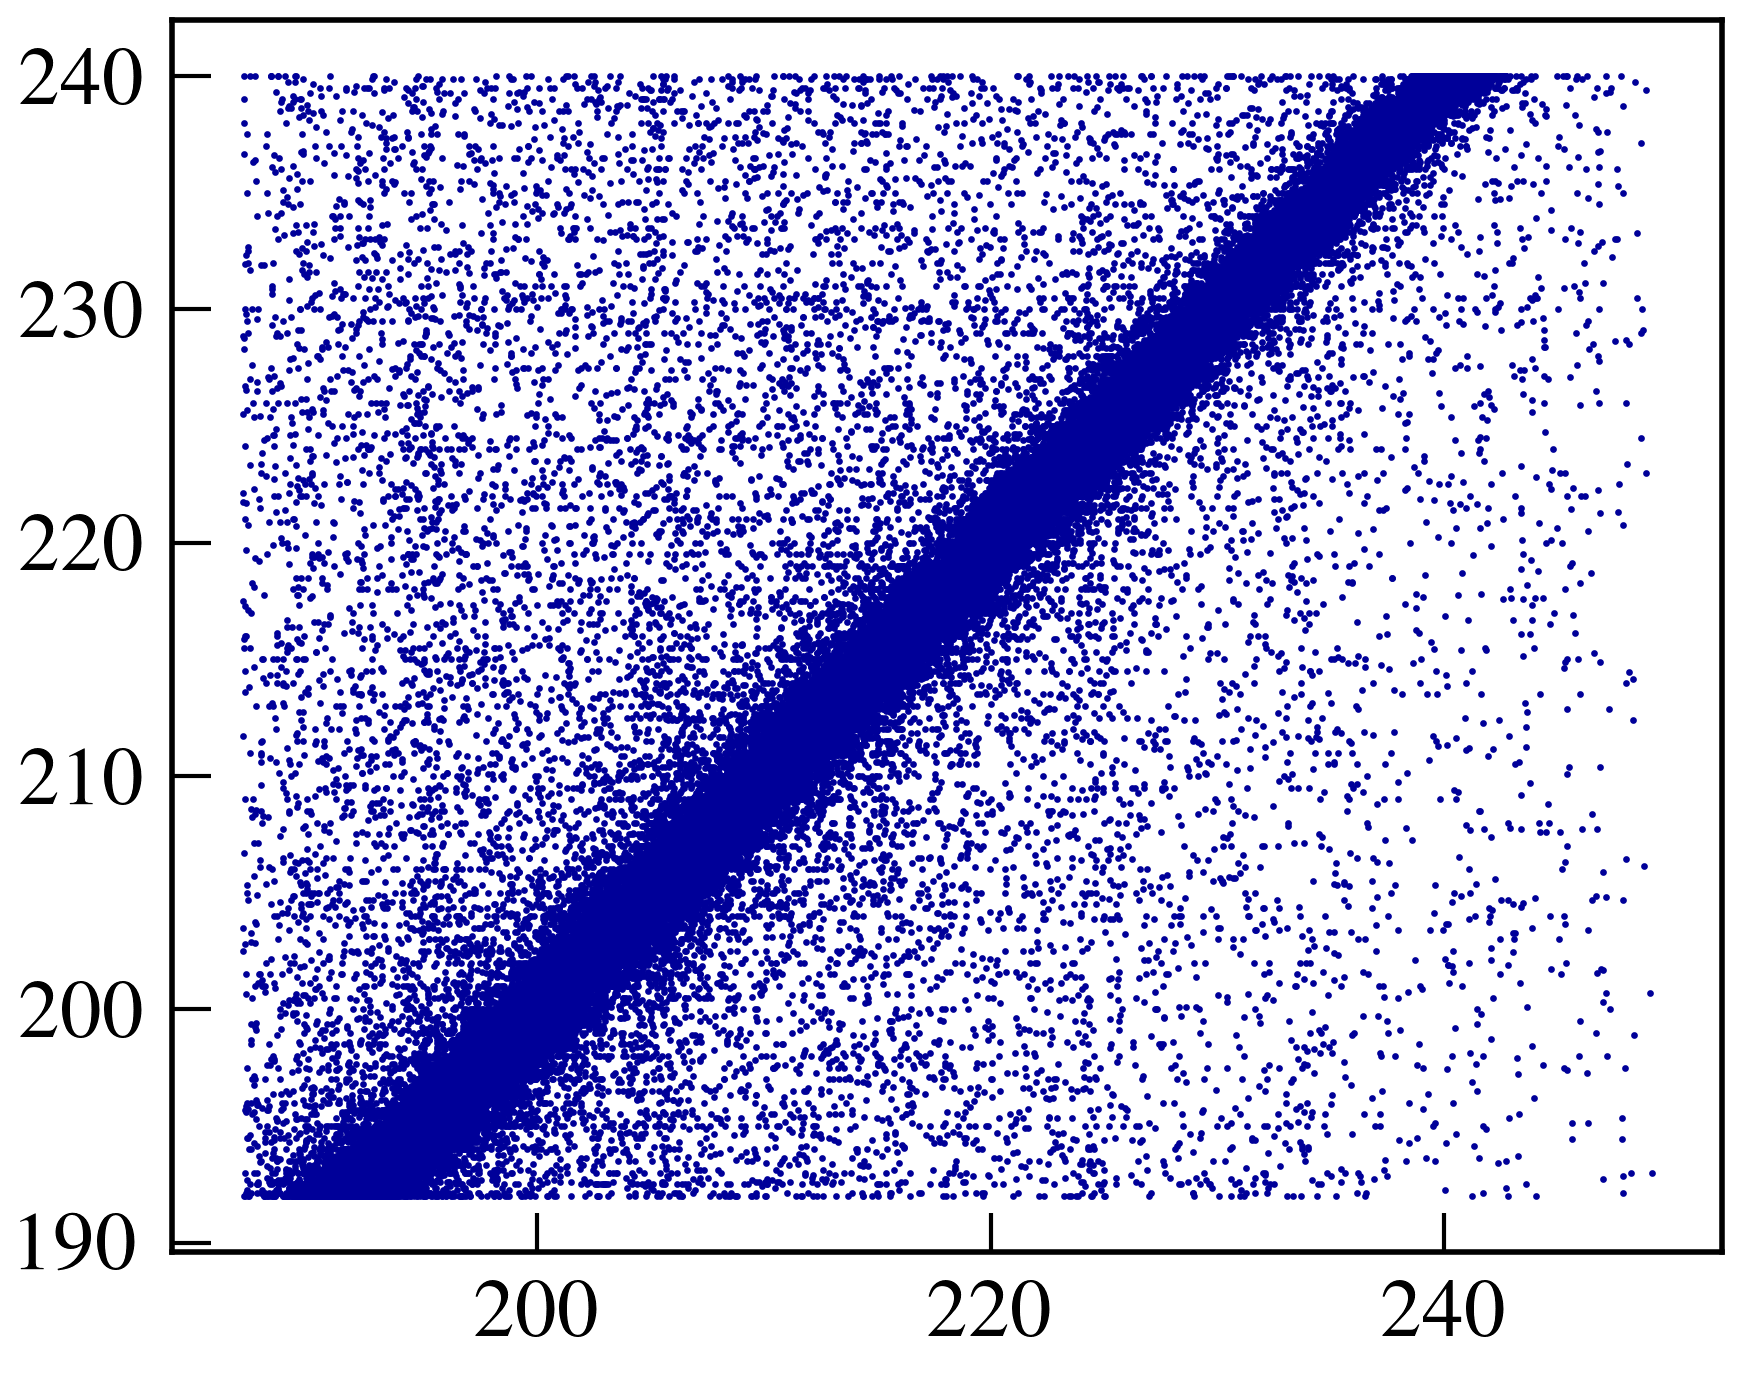

In [76]:
plt.scatter(corr_tracks, corr_posis, s=2)

# Raw data examination

In [58]:
chans = range(194, 239)

DF_L0 = rp.read_root("/auto/data/berninghoff/tb2017_1_Output/SPIROC/Preselection/Layer_0/tb2017_1_spiroc_3GeV.root", 
                     "SPIROC", columns=["Ch_{}".format(ch) for ch in chans]+["TrackHit_Ch"])
DF_L1 = rp.read_root("/auto/data/berninghoff/tb2017_1_Output/SPIROC/Preselection/Layer_1/tb2017_1_spiroc_3GeV.root", 
                     "SPIROC", columns=["Ch_{}".format(ch) for ch in chans]+["TrackHit_Ch"])

DF_L0.query("TrackHit_Ch > {} and TrackHit_Ch < {}".format(chans[0]-0.5, chans[-1]+0.5), inplace=True)
DF_L1.query("TrackHit_Ch > {} and TrackHit_Ch < {}".format(chans[0]-0.5, chans[-1]+0.5), inplace=True)

In [59]:
ch_matrix_L0 = DF_L0[ ["Ch_{}".format(ch) for ch in chans]].values
ch_matrix_L1 = DF_L1[ ["Ch_{}".format(ch) for ch in chans]].values

In [60]:
print("Fraction of empty events Layer 0:", np.sum( np.all(ch_matrix_L0 < 0.5, axis=1) ) / len(ch_matrix_L0))
print("Fraciton of empty events Layer 1:", np.sum( np.all(ch_matrix_L1 < 0.5, axis=1) ) / len(ch_matrix_L1))

Fraction of empty events Layer 0: 0.00145624550302
Fraciton of empty events Layer 1: 0.00212666236143


(194, 239)

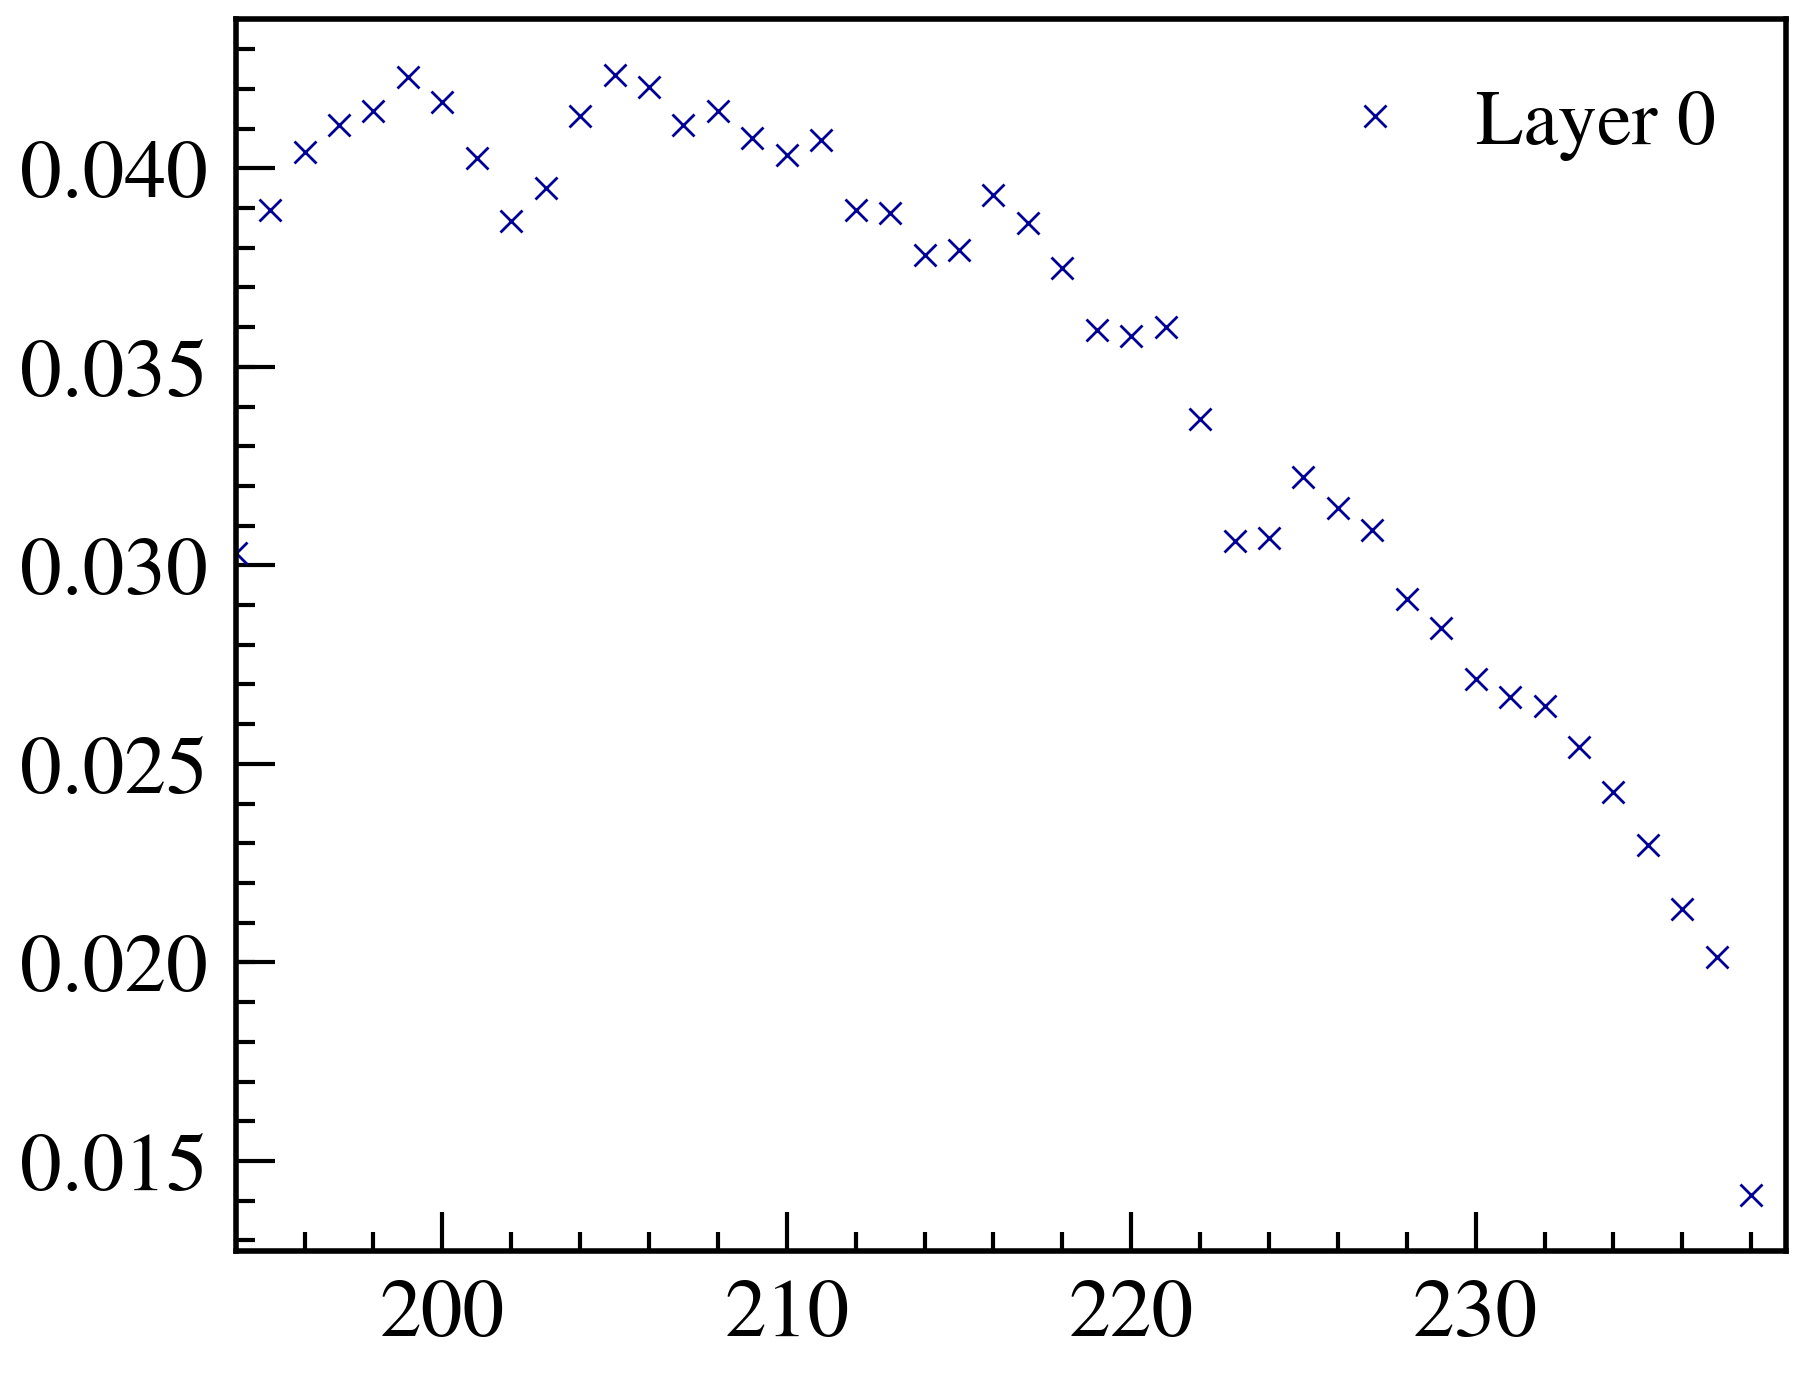

In [61]:
th=4.5
dpl.plot( range(194, 239), np.sum(ch_matrix_L0 >= th, axis=0)/len(ch_matrix_L0), "x", label="Layer 0" )
#dpl.plot( range(512), np.sum(ch_matrix_L1 >= th, axis=0)/len(ch_matrix_L1), "x", label="Layer 1" )
plt.legend()

plt.xlim(194, 239)

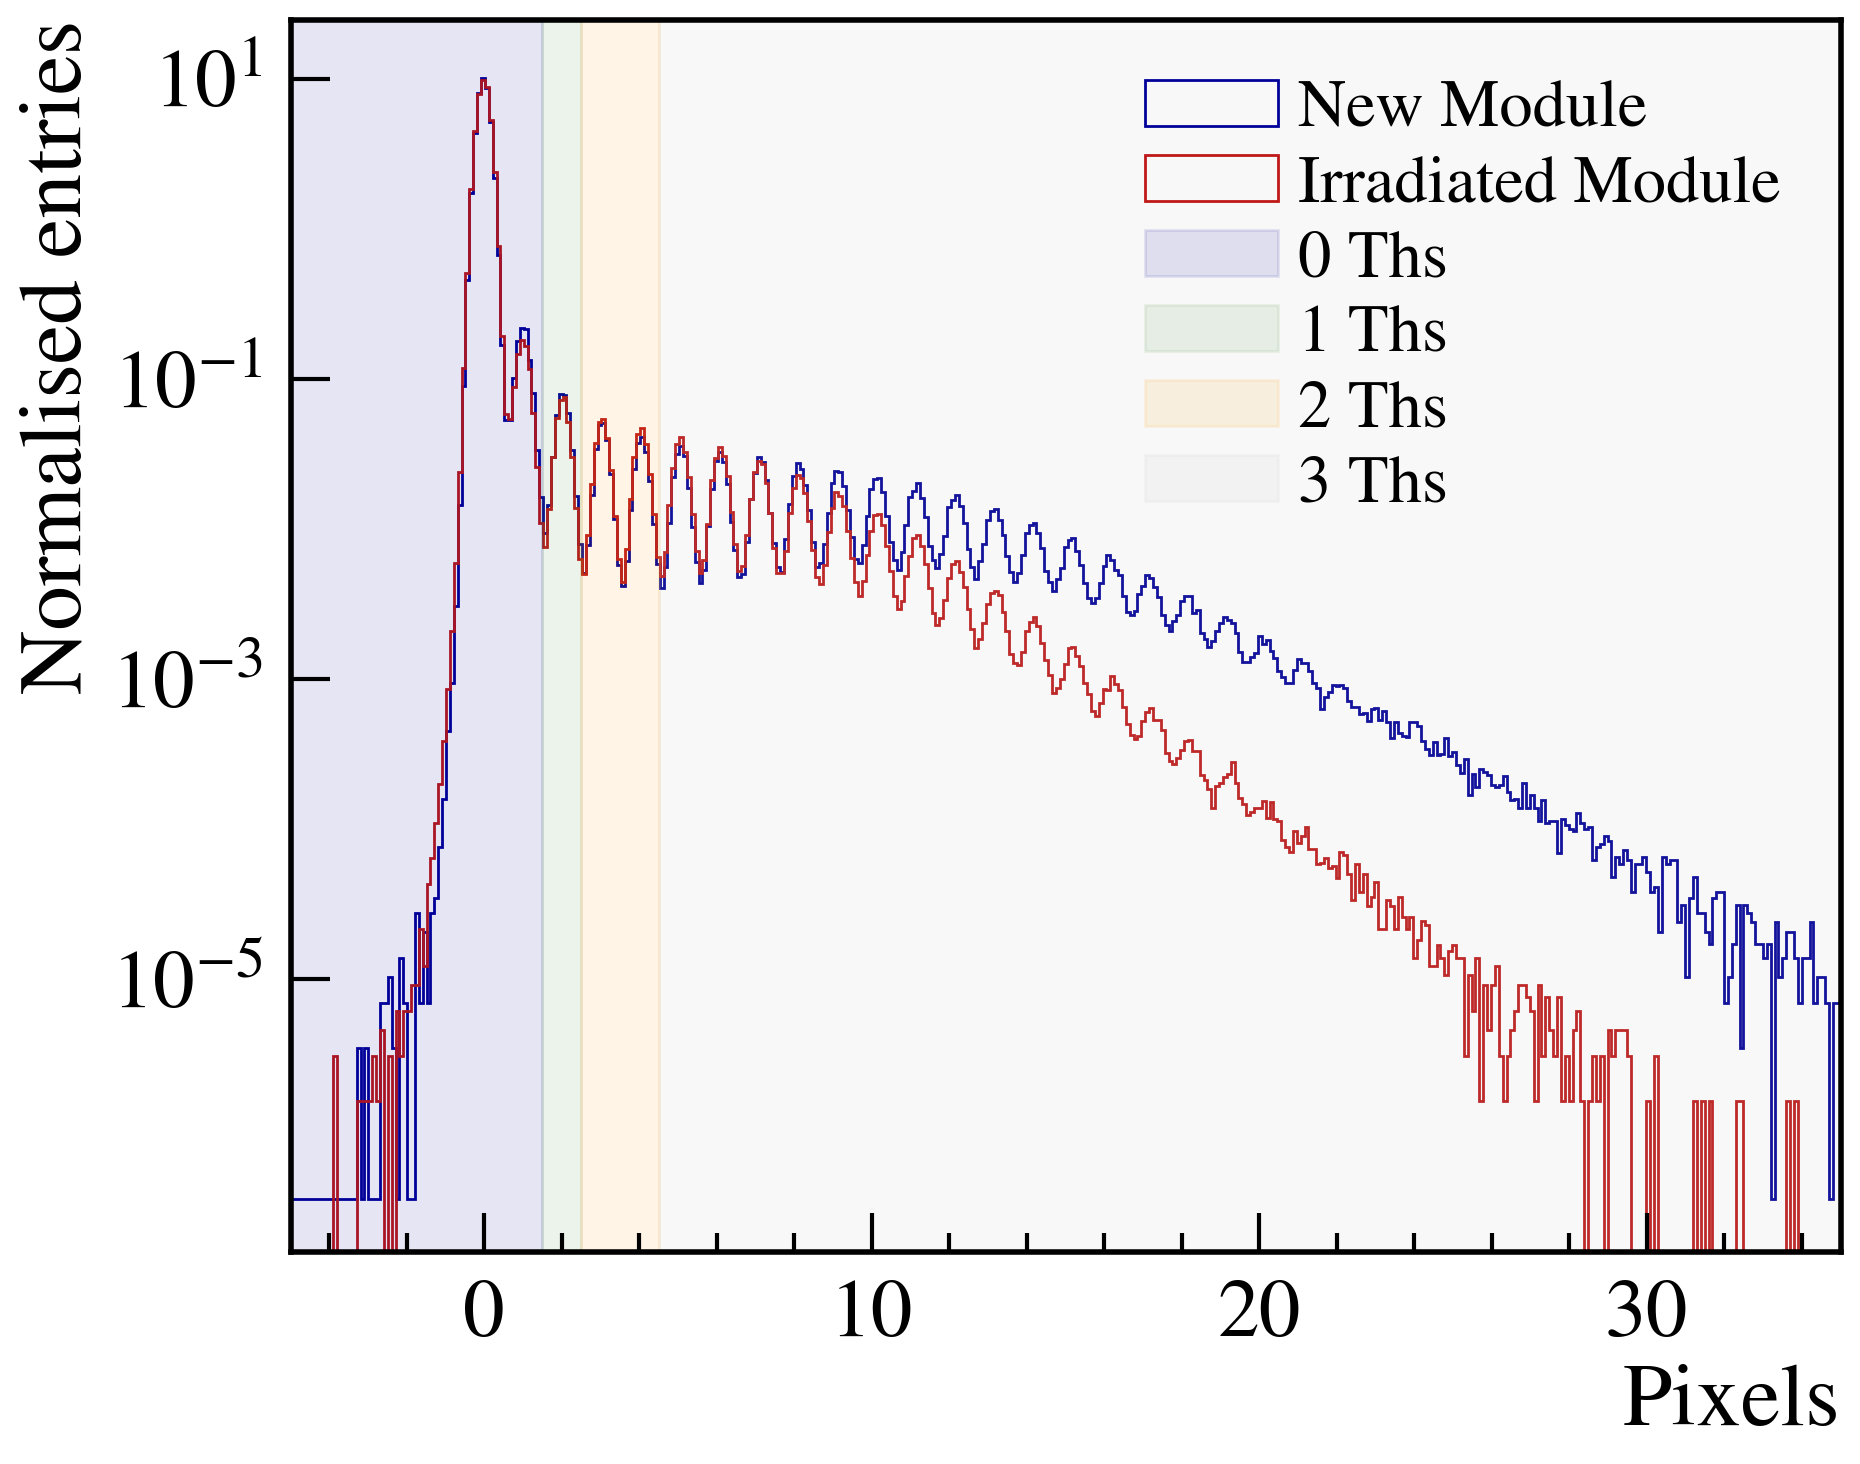

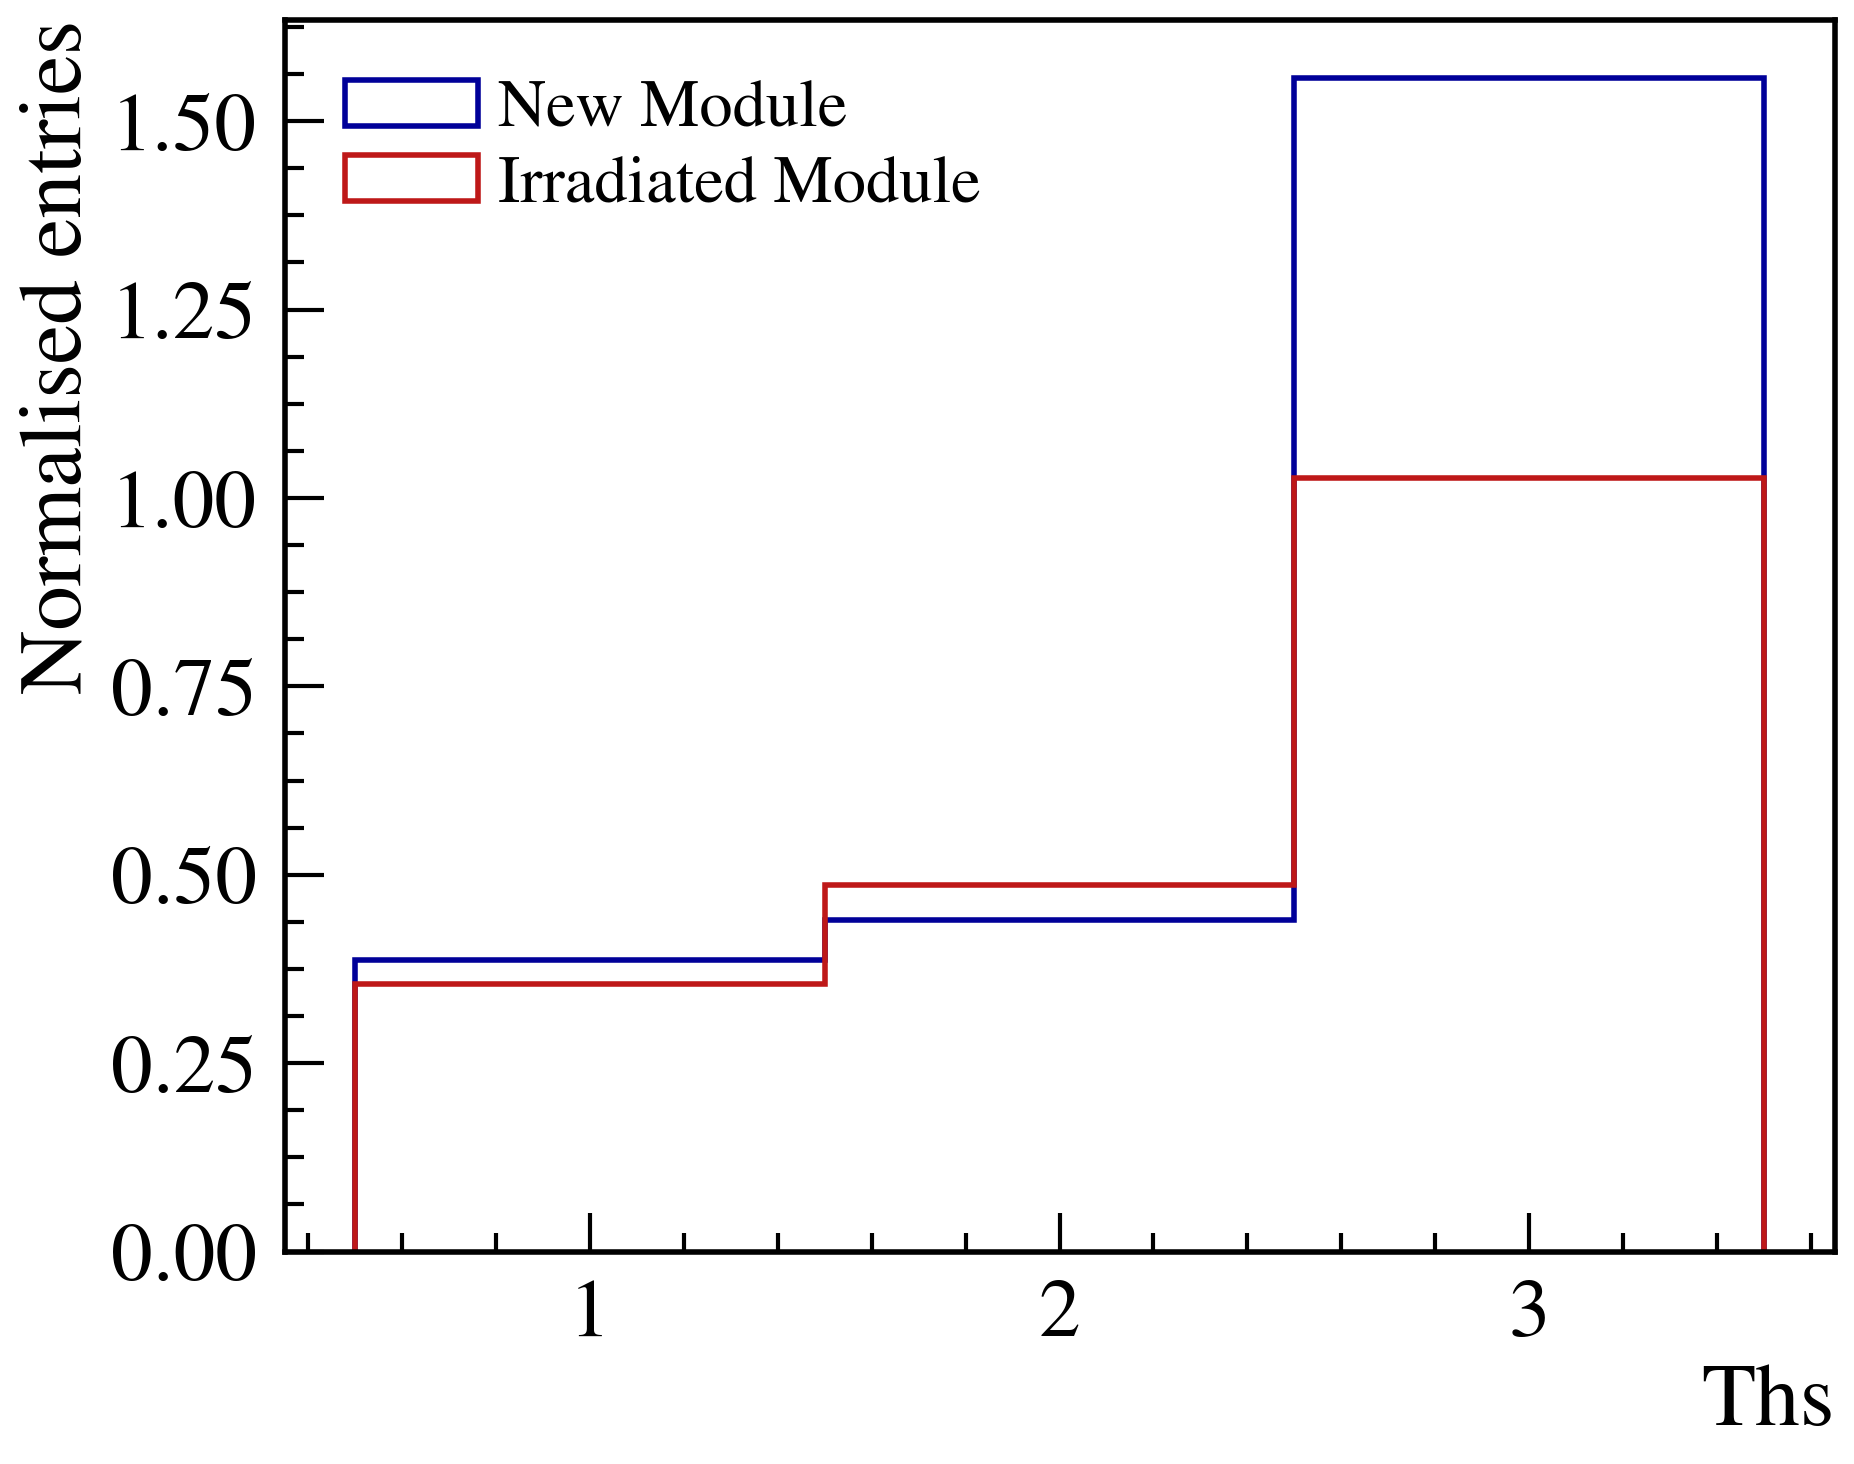

In [62]:
ch_idx = 10
binning = np.linspace(-5, 35, 400)
logy = True
normed = False 
ths = [1.5, 2.5, 4.5]


#plt.figure(figsize=(16,8))
dpl.hist( ch_matrix_L0.flatten(), weights=ch_matrix_L0.size*[1./len(ch_matrix_L0)], bins=binning, 
         label="New Module", histtype="step", log=logy, normed=normed, linewidth=1)
dpl.hist( ch_matrix_L1.flatten(), weights=ch_matrix_L1.size*[1./len(ch_matrix_L1)], bins=binning, 
         label="Irradiated Module", histtype="step", log=logy, linewidth=1, normed=normed )
dpl.ylabel("Normalised entries")
dpl.xlabel("Pixels")
if ths:
    plt.axvspan(binning[0], ths[0], label="0 Ths", alpha=0.1, color="gcblue")
    plt.axvspan(ths[0], ths[1], label="1 Ths", alpha=0.1, color="gcgreen")
    plt.axvspan(ths[1], ths[2], label="2 Ths", alpha=0.1, color="gcorange")
    plt.axvspan(ths[2], binning[-1], label="3 Ths", alpha=0.1, color="gcgrey")

plt.xlim(binning[0], binning[-1])
plt.legend(fontsize=24)
plt.show()
plt.close()

#Convert into PACIFIC
dpl.hist( TB.SPIROC2Ths(ch_matrix_L0).flatten(), weights=ch_matrix_L0.size*[1./len(ch_matrix_L0)], 
         bins=np.arange(0.5, 4, 1), 
         histtype="step", label="New Module", normed=normed, log=False)
dpl.hist( TB.SPIROC2Ths(ch_matrix_L1).flatten(), weights=ch_matrix_L1.size*[1./len(ch_matrix_L1)], 
         bins=np.arange(0.5, 4, 1), 
         histtype="step", label="Irradiated Module", normed=normed, log=False)
dpl.ylabel("Normalised entries")
dpl.xlabel("Ths")
plt.legend(fontsize=24, loc="upper left")
plt.show()
plt.close()

In [92]:
print(np.mean([99.96-97.16, 99.7-90.87, 99.4-83.42]))
print(np.mean([98.91-96.03, 94.39-84.86, 90.87-77.49]))

9.20333333333
8.59666666667
